# Tutorial of Making model MNIST based GAN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

## Load MNIST data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

## define parameters


In [4]:
hidden_size = 256
input_size = 28*28

class_size = 10
noise_size = 128

In [5]:
X = tf.placeholder(dtype=tf.float32, shape = [None, input_size]) #image
Y = tf.placeholder(dtype=tf.float32, shape = [None, class_size]) #label
Z = tf.placeholder(dtype=tf.float32, shape = [None, noise_size]) #noise
# None ; 입력받는 데이터 갯수 미정

## define making model function

In [6]:
def generator(noise, labels):
    with tf.variable_scope('generator'): # 가중치의 범위를 정해줌. 텐서플로우 변수의 그룹명 지정
        inputs = tf.concat(values=[noise, labels], axis=1)
        hidden = tf.layers.dense(inputs=inputs, units = hidden_size, activation=tf.nn.relu)
        output = tf.layers.dense(inputs=hidden, units = input_size, activation=tf.nn.sigmoid)
        # nose.shape => [None, 128], labels.shape => [None, 10] ==> [None, 138]
    return output

In [7]:
def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        if reuse:
            scope.reuse_variables()
            
        inputs = tf.concat(values=[inputs, labels], axis=1)
        hidden = tf.layers.dense(inputs=inputs, units=hidden_size, activation=tf.nn.relu)
        output = tf.layers.dense(inputs=hidden, units=1, activation = None)# boolean variable
   # activation이 None -> linear activation
    return output


## define model

In [8]:
G = generator(Z, Y)
D_real = discriminator(X,Y)
D_fake = discriminator(G, Y, reuse=True)

## define the cost function

In [16]:
loss_D_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real, labels=tf.ones_like(D_real)))
loss_D_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels=tf.zeros_like(D_fake)))
loss_D = loss_D_real + loss_D_fake
# tf.ones_like -> 다 1로
# D_real - 진짜 사진이여서, 1로 반환되어야 함. logit -> 학습하려는 값, labels -> 목표값
# D_fake = 0으로.

loss_G = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake, labels = tf.ones_like(D_fake)))

In [19]:
# 생성기와 판별기를 별도로 학습하기 위해 변수를 따로 지정
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'generator')

# var_list 에 지정된 변수만 조정하여 학습함.
train_D = tf.train.AdamOptimizer().minimize(loss_D, var_list = vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G, var_list = vars_G)

In [29]:
# noise 생성 함수
def get_noise(batch_size, noise_size):
    return np.random.uniform(low=-1., high=1., size=[batch_size, noise_size])

Epoch: 0000 D loss: 0.009989 G loss: 8.043


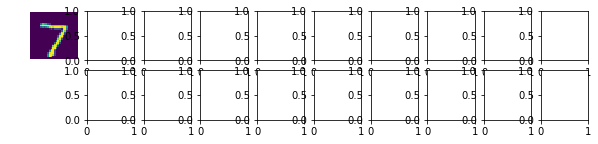

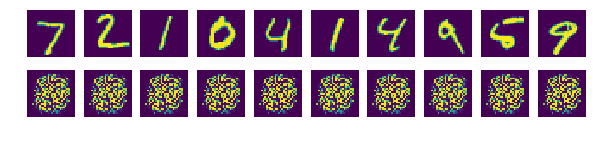

Epoch: 0001 D loss: 0.01077 G loss: 7.914
Epoch: 0002 D loss: 0.01974 G loss: 7.179
Epoch: 0003 D loss: 0.001036 G loss: 10.85
Epoch: 0004 D loss: 0.002356 G loss: 8.384


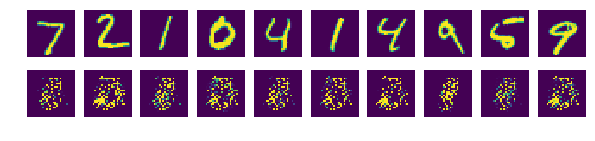

Epoch: 0005 D loss: 0.004068 G loss: 9.7
Epoch: 0006 D loss: 0.005963 G loss: 9.332
Epoch: 0007 D loss: 0.001788 G loss: 11.07
Epoch: 0008 D loss: 0.0006497 G loss: 10.32
Epoch: 0009 D loss: 0.0009213 G loss: 12.59


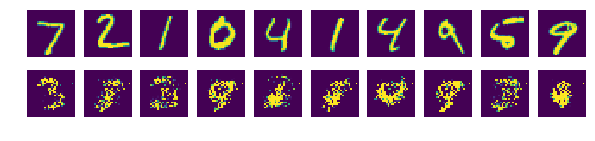

Epoch: 0010 D loss: 0.005062 G loss: 9.529
Epoch: 0011 D loss: 0.006669 G loss: 10.25
Epoch: 0012 D loss: 0.03212 G loss: 8.312
Epoch: 0013 D loss: 0.03062 G loss: 6.824
Epoch: 0014 D loss: 0.07952 G loss: 7.211


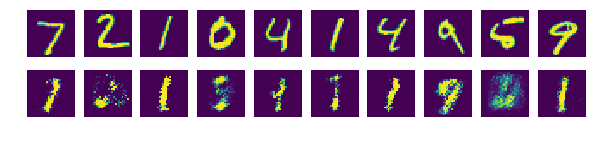

Epoch: 0015 D loss: 0.1578 G loss: 5.866
Epoch: 0016 D loss: 0.2568 G loss: 5.253
Epoch: 0017 D loss: 0.2775 G loss: 5.79
Epoch: 0018 D loss: 0.2734 G loss: 5.395
Epoch: 0019 D loss: 0.2529 G loss: 3.831


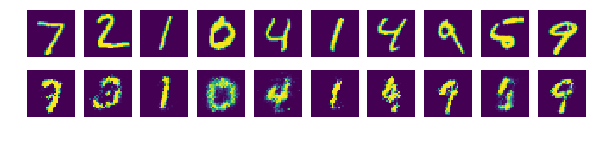

Epoch: 0020 D loss: 0.3829 G loss: 4.744
Epoch: 0021 D loss: 0.4465 G loss: 3.936
Epoch: 0022 D loss: 0.2187 G loss: 4.433
Epoch: 0023 D loss: 0.3503 G loss: 3.384
Epoch: 0024 D loss: 0.7506 G loss: 5.179


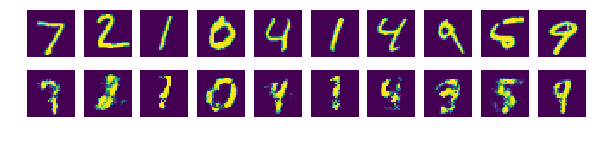

Epoch: 0025 D loss: 0.3416 G loss: 3.876
Epoch: 0026 D loss: 0.5807 G loss: 3.232
Epoch: 0027 D loss: 0.4371 G loss: 3.063
Epoch: 0028 D loss: 0.3586 G loss: 3.349
Epoch: 0029 D loss: 0.4164 G loss: 3.029


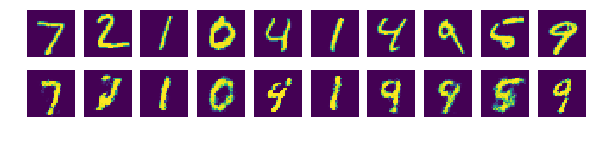

Epoch: 0030 D loss: 0.7534 G loss: 2.759
Epoch: 0031 D loss: 0.4372 G loss: 3.014
Epoch: 0032 D loss: 0.7108 G loss: 2.468
Epoch: 0033 D loss: 0.6593 G loss: 2.465
Epoch: 0034 D loss: 0.6597 G loss: 2.439


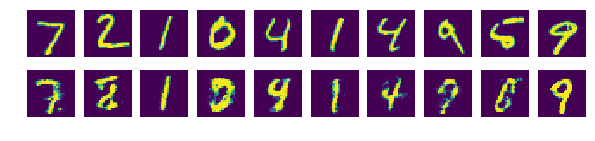

Epoch: 0035 D loss: 0.5732 G loss: 2.185
Epoch: 0036 D loss: 0.6374 G loss: 2.592
Epoch: 0037 D loss: 0.6493 G loss: 2.008
Epoch: 0038 D loss: 0.7491 G loss: 2.123
Epoch: 0039 D loss: 0.6177 G loss: 2.105


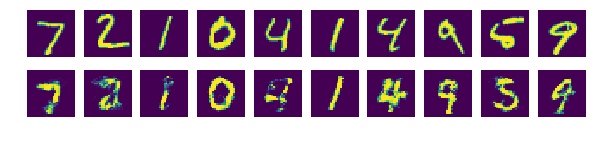

Epoch: 0040 D loss: 0.7695 G loss: 2.198
Epoch: 0041 D loss: 0.6161 G loss: 2.564
Epoch: 0042 D loss: 0.8405 G loss: 2.547
Epoch: 0043 D loss: 0.7002 G loss: 2.279
Epoch: 0044 D loss: 0.6492 G loss: 2.452


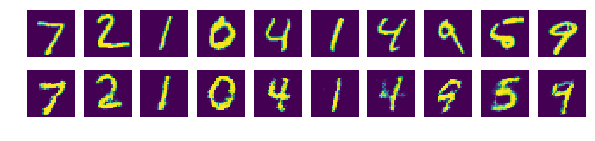

Epoch: 0045 D loss: 0.6245 G loss: 2.289
Epoch: 0046 D loss: 0.7037 G loss: 2.264
Epoch: 0047 D loss: 0.7821 G loss: 2.073
Epoch: 0048 D loss: 0.67 G loss: 2.106
Epoch: 0049 D loss: 0.5131 G loss: 2.439


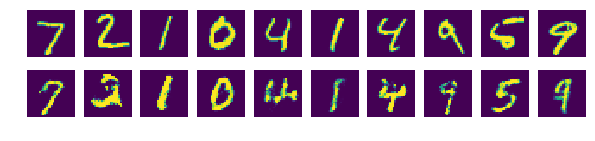

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 100
total_epoch = 50

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(total_epoch):
    for i in range(total_batch):
        # batch : 한 번에 돌리는 데이터, 병렬처리. overfitting 방지.
        # batch size : 데이터 수 (GPU)
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, noise_size)
        _, loss_val_D = sess.run([train_D, loss_D],
                                feed_dict={X: batch_xs, Y : batch_ys, Z : noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                feed_dict={Y: batch_ys, Z : noise})
        
    print('Epoch:', '%04d' % epoch,
         'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        sample_size=10
        noise = get_noise(sample_size, noise_size)
        samples = sess.run(G, feed_dict={Y: mnist.test.labels[:sample_size], Z: noise})
        
        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
        
        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()
            
            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
            ax[1][i].imshow(np.reshape(samples[i], (28,28)))
            
        plt.show()